In [1]:
%%time

import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime

#PRES_CMTES = ['BENNET FOR AMERICA','BIDEN FOR PRESIDENT','BULLOCK FOR PRESIDENT','PETE FOR AMERICA, INC.','KAMALA HARRIS FOR THE PEOPLE','AMY KLOBUCHAR VICTORY COMMITTEE','WAYNE MESSAM FOR AMERICA, INC.','TIM RYAN FOR AMERICA','WARREN FOR PRESIDENT, INC.','MARIANNE WILLIAMSON FOR PRESIDENT','FRIENDS OF ANDREW YANG','CORY 2020','JULIAN FOR THE FUTURE','FRIENDS OF JOHN DELANEY','TULSI NOW','BETO FOR AMERICA','BERNIE 2020','JOE SESTAK FOR PRESIDENT','TOM STEYER 2020']
CORE_COLUMNS = ['CMTE_NM','RPT_TP','NAME','CITY','STATE','ZIP_CODE','TRANSACTION_DT','TRANSACTION_AMT','PURPOSE','CATEGORY']


# Read in data
df_header = pd.read_csv("~/Documents/Insight/Data - Insight/oppexp_header_file.csv")
df = pd.read_csv("~/Documents/Insight/Data - Insight/oppexp06/oppexp.txt", delimiter="|", low_memory=False, names=df_header.columns, index_col=False)
cmte_header = pd.read_csv("~/Documents/Insight/Data - Insight/cm20/cm_header_file.csv") # pull in header for committee names file
cmte_names = pd.read_csv("~/Documents/Insight/Data - Insight/cm20/cm.txt", delimiter="|", names=cmte_header.columns) # pull in committee names file

# Clean data
df = ( df.set_index('CMTE_ID') ).join(cmte_names.set_index('CMTE_ID')) 
df = df.reset_index()
df['TRANSACTION_DT']=pd.to_datetime(df['TRANSACTION_DT'],errors = 'coerce')
df = df[df['TRANSACTION_AMT']>0]
#df = df[df.apply(lambda x: x.CMTE_NM in PRES_CMTES, axis=1)]

print('timed')

timed
Wall time: 23.5 s


In [4]:
df = df[df['CMTE_NM']=='FRIENDS FOR HARRY REID']

In [8]:
len(df)

720

In [16]:
%%time

from sklearn.cluster import DBSCAN
import numpy as np

#df1 = df[55000:].copy()
clustering = DBSCAN(eps=30, min_samples=10).fit_predict(df[['TRANSACTION_AMT']])
#clustering.labels_

print(clustering) 

[ 0 -1 -1 -1  0  0  0  0  0  0 -1 -1  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  4 -1 -1  0  0  0  2  2  2
  0  0  0  0  0  1  3  0  0  0  0  0  0  0  4  4  0  4  0  0  0  0  0  0
  0 -1  3  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  2  2  2  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  4  0  4  0  4
  0  0  0 -1  0  0  0  0  0  3  3  0  0  0  0  0  0  0  0  0  0 -1  0  0
 -1 -1 -1  1  0  0  0  0  0  0  0  0  0  3  0  0 -1  1  0  0  0  3  0 -1
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  1  0  0  0  0  0  0  1  0  0
  0  2 -1  0  0  0 -1  1 -1  0  0  0  0  5  0  5  0  5  0  0  0  0  0  0
  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  3  0  0  0
  0  0  0  2  2  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1
  0 -1  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0

In [17]:
max(clustering)
sum(clustering==-1)

outliers = df[clustering==-1]

In [18]:
outliers[outliers.PURPOSE == 'SALARY'][CORE_COLUMNS]

,CMTE_NM,RPT_TP,NAME,CITY,STATE,ZIP_CODE,TRANSACTION_DT,TRANSACTION_AMT,PURPOSE,CATEGORY
313381,FRIENDS FOR HARRY REID,YE,REC EMPLOYEE HOLIDAY FUND,WASHINGTON,DC,20037,2005-11-17,1500.0,SALARY,NaN
313745,FRIENDS FOR HARRY REID,YE,"DWYER, SHEILA",ALEXANDRIA,VA,223143915,2006-11-30,1531.0,SALARY,NaN
313774,FRIENDS FOR HARRY REID,YE,"PERRY, DAVID JAKE MR",WASHINGTON,DC,20036,2006-12-31,1130.0,SALARY,NaN


In [20]:
outliers

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,...,CMTE_CITY,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID
313257,C00204370,N,2005,Q3,25020391679,17,F3,SB,AMERICAN EXPRESS,CHICAGO,...,WASHINGTON,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028
313258,C00204370,N,2005,Q3,25020391679,17,F3,SB,HUNAN DYNASTY,WASHINGTON,...,WASHINGTON,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028
313259,C00204370,N,2005,Q3,25020391680,17,F3,SB,TAKE OUT TAXI,FALLS CHURCH,...,WASHINGTON,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028
313266,C00204370,N,2005,Q3,25020391682,17,F3,SB,BANK OF AMERICA,LAS VEGAS,...,WASHINGTON,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028
313267,C00204370,N,2005,Q3,25020391682,17,F3,SB,ART OF PETER MAX,NEW YORK,...,WASHINGTON,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313945,C00204370,N,2006,Q3,26020730032,17,F3,SB,LAGUNA PRODUCTIONS,LAS VEGAS,...,WASHINGTON,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028
313946,C00204370,N,2006,Q3,26020730033,17,F3,SB,MELLMAN GROUP,WASHINGTON,...,WASHINGTON,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028
313947,C00204370,N,2006,Q3,26020730033,17,F3,SB,MELLMAN GROUP,WASHINGTON,...,WASHINGTON,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028
313951,C00204370,N,2006,Q3,26020730034,17,F3,SB,NGP SOFTWARE INC.,WASHINGTON,...,WASHINGTON,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028


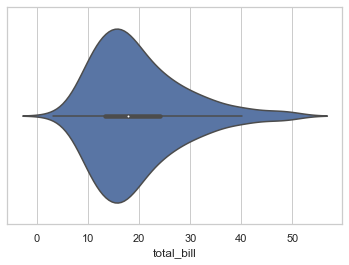

In [48]:
import seaborn as sns
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.violinplot(x=tips["total_bill"])

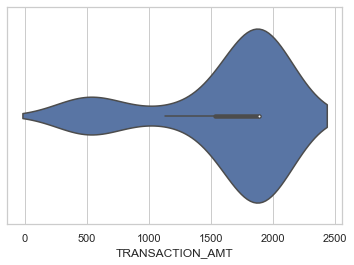

In [49]:
import seaborn as sns
data = df.loc[df['PURPOSE']=='SALARY','TRANSACTION_AMT']
ax = sns.violinplot(x=df.loc[df['PURPOSE']=='SALARY','TRANSACTION_AMT'])
#ax.set_xscale('log')

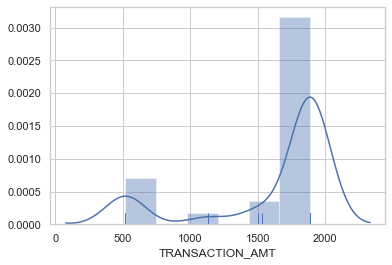

In [87]:
dist_fig = sns.distplot(data, rug=True, hist=True)

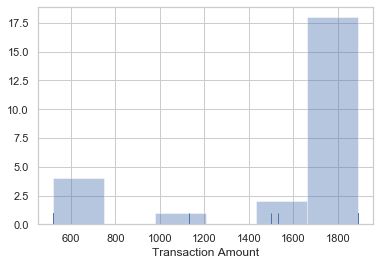

In [102]:
hist_fig = sns.distplot(data, rug=True, hist=True, kde=False, norm_hist=False, axlabel="Transaction Amount")#, label="Hello World")
hist_vals = hist_fig.get_yticks()
hist_vals

##source: https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels
# import matplotlib.ticker as mtick
# fmt = '${x:,.0f}'
# tick = mtick.StrMethodFormatter(fmt)
# ax.xaxis.set_major_formatter(tick) 

# #source: https://stackoverflow.com/questions/32244753/how-to-save-a-seaborn-plot-into-a-file
# swarm_plot = sns.swarmplot(...)
# fig = swarm_plot.get_figure()
# fig.savefig(...) 

#swarm_plot = sns.swarmplot(...)
image_to_save = hist_fig.get_figure()
image_to_save.savefig('harry_plot.png', transparent=True) 

In [101]:
help(image_to_save.savefig)

Help on method savefig in module matplotlib.figure:

savefig(fname, *, transparent=None, **kwargs) method of matplotlib.figure.Figure instance
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None, metadata=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    
    fname : str or PathLike or file-like object
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is not set, then the output format is inferred from
        the extension of *fname*, if any, and from :rc:`savefig.format`
        otherwise.  If *format* is set, it determines the output format.
    
        Hence, i

[Text(0, 0, '0.0'),
 Text(0, 0, '2.5'),
 Text(0, 0, '5.0'),
 Text(0, 0, '7.5'),
 Text(0, 0, '10.0'),
 Text(0, 0, '12.5'),
 Text(0, 0, '15.0'),
 Text(0, 0, '17.5')]

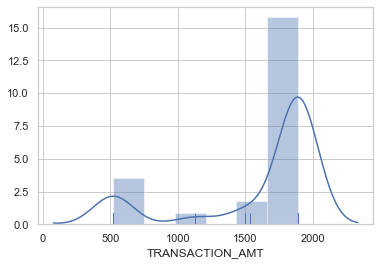

In [94]:
dist_fig = sns.distplot(data, rug=True, hist=True)
dist_fig.set_yticklabels(hist_vals)

In [90]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

In [57]:
vals = fig.get_yticks()
vals

array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035])

In [64]:
#ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
fig.set_yticklabels([float(x)*len(data) for x in vals])
fig.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

TypeError: set_xticklabels() missing 1 required positional argument: 'labels'

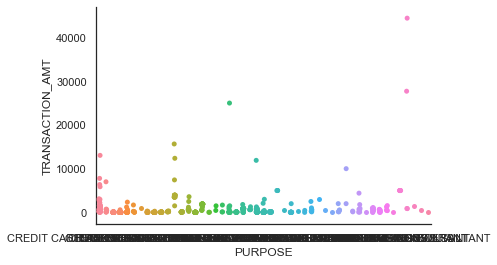

In [107]:
## source: dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

# iris = sns.load_dataset('iris')
# sns.set(style="white", color_codes=True)
# sns.stripplot(x='species', y='petal_length', data=iris)
# sns.despine()

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

iris = sns.load_dataset('iris')
sns.set(style="white", color_codes=True)
sns.stripplot(x='PURPOSE', y='TRANSACTION_AMT', data=df[['TRANSACTION_AMT','PURPOSE']])
sns.despine()

In [124]:
type(clustering)

numpy.ndarray

In [140]:
rows_in_top_cats.head()

,CMTE_ID,AMNDT_IND,RPT_YR,RPT_TP,IMAGE_NUM,LINE_NUM,FORM_TP_CD,SCHED_TP_CD,NAME,CITY,...,CMTE_ST,CMTE_ZIP,CMTE_DSGN,CMTE_TP,CMTE_PTY_AFFILIATION,CMTE_FILING_FREQ,ORG_TP,CONNECTED_ORG_NM,CAND_ID,cluster
313261,C00204370,N,2005,Q3,25020391681,17,F3,SB,VERIZON AVENUE,TAMPA,...,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028,0
313270,C00204370,N,2005,Q3,25020391684,17,F3,SB,VERIZON AVENUE,TAMPA,...,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028,0
313274,C00204370,N,2005,Q3,25020391685,17,F3,SB,VERIZON AVENUE,TAMPA,...,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028,0
313275,C00204370,N,2005,Q3,25020391656,17,F3,SB,AT&T,MAITLAND,...,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028,0
313276,C00204370,N,2005,Q3,25020391656,17,F3,SB,AT&T,MAITLAND,...,DC,20005,P,S,DEM,Q,NaN,NaN,S6NV00028,0


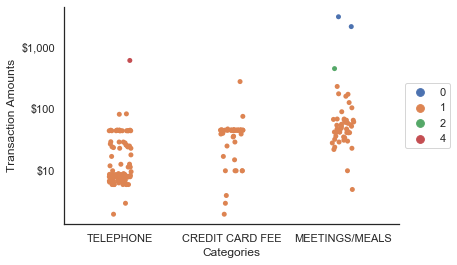

In [144]:
import matplotlib.ticker as mtick
#find top categories
df['cluster']=clustering
df['PURPOSE'].value_counts()
TOP_CATS = ['TELEPHONE','CREDIT CARD FEE','MEETINGS/MEALS']

sns.set(style="white", color_codes=True)
rows_in_top_cats = df.loc[df['PURPOSE'].isin(TOP_CATS)]
g = sns.stripplot(x='PURPOSE', y='TRANSACTION_AMT', hue=(rows_in_top_cats['cluster'] + 1),data=rows_in_top_cats[['TRANSACTION_AMT','PURPOSE']])
sns.despine()
#/max(rows_in_top_cats)
#g.fig.get_axes()[0].set_yscale('log')
g.set_yscale('log')
g.set(xlabel='Categories', ylabel='Transaction Amounts')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
g.yaxis.set_major_formatter(tick) 
#g.scatter(t,,c=clustering)

#ok, now, show the clusters in the data

# Put a legend to the right of the current axis
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [195]:
#ok, now, do the clustering per category
indices_with_cat = []
cluster_number = 0
for cat in TOP_CATS:
    indices_with_cat = (df['PURPOSE']==cat)
    df.loc[indices_with_cat,'cluster2'] = DBSCAN(eps=30, min_samples=10).fit_predict(df.loc[indices_with_cat,['TRANSACTION_AMT']]) + cluster_number
    cluster_number += 10
    
# send cluster2 to cluster3 with x%10=0 as 0
df['cluster3']=df['cluster2'].apply(lambda x: 0 if x%10==0 else x)

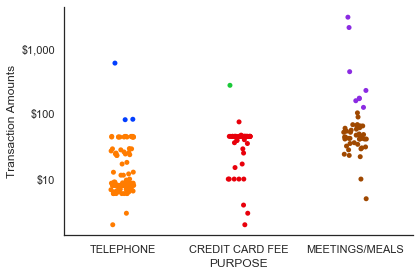

In [230]:
#fig = plt.figure(figsize=(20,6))

# Set the color palette
sns.set_palette(sns.color_palette("bright")) # doesn't work
#sns.set_palette("bright") # doesn't work
#sns.set(style="white", color_codes=True)
rows_in_top_cats = df.loc[df['PURPOSE'].isin(TOP_CATS)]

g = sns.stripplot(x='PURPOSE', y='TRANSACTION_AMT', cmap=cmap, hue=(rows_in_top_cats['cluster2'] + 1),data=rows_in_top_cats[['TRANSACTION_AMT','PURPOSE']])
sns.despine()
#/max(rows_in_top_cats)
#g.fig.get_axes()[0].set_yscale('log')
g.set_yscale('log')
g.set(ylabel='Transaction Amounts')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
g.yaxis.set_major_formatter(tick) 
#g.scatter(t,,c=clustering)

#ok, now, show the clusters in the data

# Put a legend to the right of the current axis
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
handles, labels = g.get_legend_handles_labels()

g.get_legend().remove()

plt.tight_layout()
#image_to_save = g.get_figure()
#image_to_save.savefig('jitter_plot_harry.png', transparent=True) 

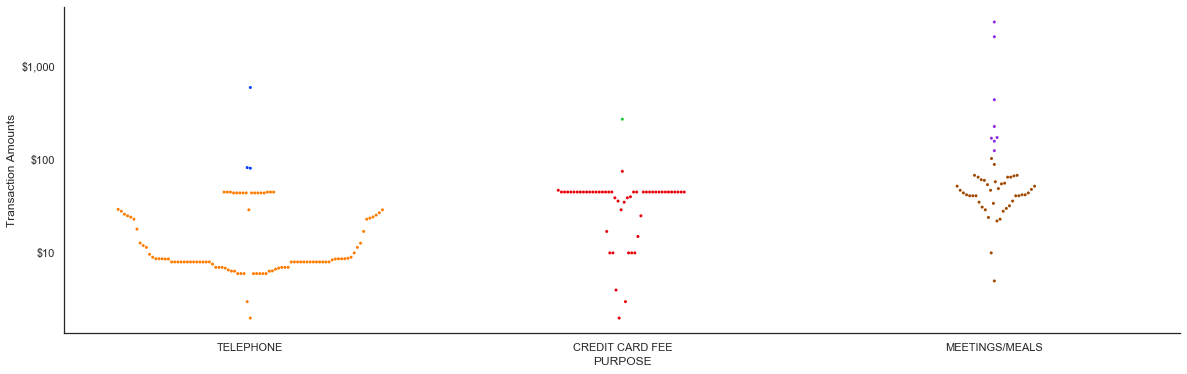

In [224]:
fig = plt.figure(figsize=(20,6))
# Set the color palette
sns.set_palette(sns.color_palette("bright")) # doesn't work
#sns.set_palette("bright") # doesn't work
#sns.set(style="white", color_codes=True)
rows_in_top_cats = df.loc[df['PURPOSE'].isin(TOP_CATS)]

g = sns.swarmplot(x='PURPOSE', y='TRANSACTION_AMT', cmap=cmap, 
                  hue=(rows_in_top_cats['cluster2'] + 1),
                  data=rows_in_top_cats[['TRANSACTION_AMT','PURPOSE']],
                 size=3)
sns.despine()
#/max(rows_in_top_cats)
#g.fig.get_axes()[0].set_yscale('log')
g.set_yscale('log')
g.set(ylabel='Transaction Amounts')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
g.yaxis.set_major_formatter(tick) 
#g.scatter(t,,c=clustering)

#ok, now, show the clusters in the data

# Put a legend to the right of the current axis
#g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#handles, labels = g.get_legend_handles_labels()

g.get_legend().remove()

#plt.tight_layout()
#image_to_save = g.get_figure()
#image_to_save.savefig('jitter_plot_harry.png', transparent=True) 

In [186]:
# change the legend labels
handles, labels = g.get_legend_handles_labels()
print(labels)
labels = ['Outlier' if int(float(label))%10==0 else f'Cluster {int(float(label))}' for label in labels]
print(labels)
g.legend(handles, labels)

['0.0', '1.0', '10.0', '11.0', '20.0', '21.0']
['Outlier', 'Cluster 1', 'Outlier', 'Cluster 11', 'Outlier', 'Cluster 21']


In [183]:
# send cluster2 to cluster3 with x%10=0 as 0
df['cluster3']=df['cluster2'].apply(0 if x%10==0)

0

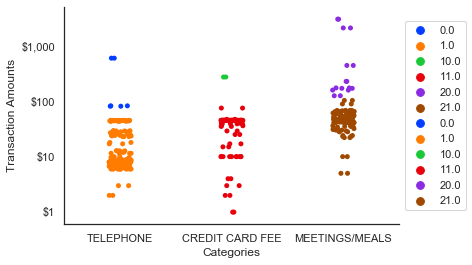

In [200]:
#ok, now, do the clustering per category
indices_with_cat = []
cluster_number = 0
for cat in TOP_CATS:
    indices_with_cat = (df['PURPOSE']==cat)
    df.loc[indices_with_cat,'cluster2'] = DBSCAN(eps=30, min_samples=10).fit_predict(df.loc[indices_with_cat,['TRANSACTION_AMT']]) + cluster_number
    cluster_number += 10
    
# send cluster2 to cluster3 with x%10=0 as 0
df['cluster3']=df['cluster2'].apply(lambda x: 0 if x%10==0 else x)
# Set the color palette
sns.set_palette(sns.color_palette("bright")) # doesn't work
#sns.set_palette("bright") # doesn't work
#sns.set(style="white", color_codes=True)
rows_in_top_cats = df.loc[df['PURPOSE'].isin(TOP_CATS)]

g = sns.stripplot(x='PURPOSE', y='TRANSACTION_AMT', cmap=cmap, hue=(rows_in_top_cats['cluster2'] + 1),data=rows_in_top_cats[['TRANSACTION_AMT','PURPOSE']])
sns.despine()
#/max(rows_in_top_cats)
#g.fig.get_axes()[0].set_yscale('log')
g.set_yscale('log')
g.set(xlabel='Categories', ylabel='Transaction Amounts')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
g.yaxis.set_major_formatter(tick) 
#g.scatter(t,,c=clustering)

#ok, now, show the clusters in the data

# Put a legend to the right of the current axis
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
handles, labels = g.get_legend_handles_labels()


# Set the color palette
sns.set_palette(sns.color_palette("bright")) # doesn't work
#sns.set_palette("bright") # doesn't work
#sns.set(style="white", color_codes=True)
rows_in_top_cats = df.loc[df['PURPOSE'].isin(TOP_CATS)]

g = sns.stripplot(x='PURPOSE', y='TRANSACTION_AMT', cmap=cmap, hue=(rows_in_top_cats['cluster2'] + 1),data=rows_in_top_cats[['TRANSACTION_AMT','PURPOSE']])
sns.despine()
#/max(rows_in_top_cats)
#g.fig.get_axes()[0].set_yscale('log')
g.set_yscale('log')
g.set(xlabel='Categories', ylabel='Transaction Amounts')
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
g.yaxis.set_major_formatter(tick) 
#g.scatter(t,,c=clustering)

#ok, now, show the clusters in the data

# Put a legend to the right of the current axis
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
handles, labels = g.get_legend_handles_labels()
